dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
>	
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
>
     1- Certain columns, like ‘cast’ and ‘genres’, 
      contain multiple values separated by pipe (|) characters.
     2- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.	
     3-The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollar,accounting for inflation over time.



### Question(s) for Analysis

>
 Research Question 1 (display movie runtime greater than 180?).
 
 Research Question 2 (in Which year ther was the highest vote_average?).
 
 Research Question 3 ( Which film ther was the highest popularity?).
 
 Research Question 4 ( Which film ther was the highest revenue?).
 
 Research Question 5 ( Does vote_average or vote_count  affect popularity?)
 
 Research Question 6 ( number of films per year?).
 
 Research Question 7 (from whate consist genres column?)
 
 Research Question 8 (How many film created for each gener?)
 
 Research Question 9 (What kinds of properties are associated with movies that have high revenues?)
 
 
 
 

 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt #visualization
import seaborn as sns  #visualization
%matplotlib inline
from collections import Counter #usefull for countr



<a id='wrangling'></a>
## Data Wrangling




### General Properties


In [2]:
#load data
df=pd.read_csv('tmdb-movies.csv')
df.head(4)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [20]:
df.tail(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [21]:
print('number of rows =', df.shape[0])
print('number of columns =', df.shape[1])


number of rows = 10866
number of columns = 21


In [3]:
list(df.columns) #explor

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [4]:
df.info() #data info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
df.duplicated().sum() #num of duplicated row

1

# whate we will do at data
#### drop columns thats unimportant for Exploratory
#### the data need to clean from null values
#### we also delete duplicates 
#### the the given in the dataset is in string format at release_date ,must change     


### Data Cleaning


In [6]:
df.drop(columns =['imdb_id','cast','homepage','tagline','budget_adj','revenue_adj','production_companies','keywords'], inplace = True) 


In [7]:
df.info() #data info after drop  some columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   director        10822 non-null  object 
 6   overview        10862 non-null  object 
 7   runtime         10866 non-null  int64  
 8   genres          10843 non-null  object 
 9   release_date    10866 non-null  object 
 10  vote_count      10866 non-null  int64  
 11  vote_average    10866 non-null  float64
 12  release_year    10866 non-null  int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

 so columns   director , genres and overview   have null values

In [9]:
df.fillna(0)


,id,popularity,budget,revenue,original_title,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.080598,0,0,The Endless Summer,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,6/15/66,11,7.4,1966
10862,20379,0.065543,0,0,Grand Prix,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,12/21/66,20,5.7,1966
10863,39768,0.065141,0,0,Beregis Avtomobilya,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,1/1/66,11,6.5,1966
10864,21449,0.064317,0,0,"What's Up, Tiger Lily?",Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,11/2/66,22,5.4,1966


drop duplicates

In [10]:
df.drop_duplicates(inplace = True)  #delet duplicates

In [11]:
df.duplicated().sum() #check

0

In [12]:
#the the given in the dataset is in string format.
#So we need to change this in datetime format

df['release_date'] = pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   director        10821 non-null  object        
 6   overview        10861 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10842 non-null  object        
 9   release_date    10865 non-null  datetime64[ns]
 10  vote_count      10865 non-null  int64         
 11  vote_average    10865 non-null  float64       
 12  release_year    10865 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis





In [14]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000,10865.000000
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012,2001.321859
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138,12.813260
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000,2011.000000
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


max popularit equal nearly 33 and max runtime 900

# Research Question 1 (display movie runtime greater than 180?)

In [15]:
df.columns


Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'overview', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [16]:
df[df['runtime'] >=180][['original_title']].head()

,original_title
415,Show Me a Hero
559,Childhood's End
609,The Jinx: The Life and Deaths of Robert Durst
989,Olive Kitteridge
1077,Houdini


we have 109 movie have runtime greater than 180

# Research Question 2 (in Which year ther was the highest vote_average?)

In [17]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'overview', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [29]:
#built function  to avoid repetitive code
def large(n,x,y):
    return df.nlargest(n,x)[[y,x]].set_index(y) # nlargest method at data frame usefull for this case


In [30]:
q = large(6,'vote_average','release_year')
q

,vote_average
release_year,
2011,9.2
2015,8.9
2014,8.8
2010,8.8
2006,8.7
2010,8.6


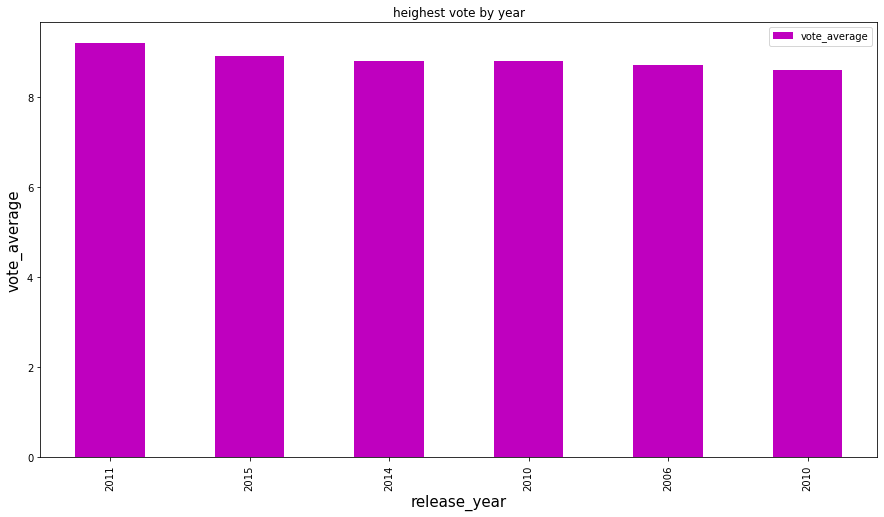

In [31]:
# creat ber plot
q.plot(kind='bar',figsize=(15,8),color='m',label='vote_average');
plt.title('heighest vote by year');
plt.xlabel('release_year',fontsize=15); 
plt.ylabel('vote_average',fontsize=15); 



from bar chart sound that '2011' have a highest vote_average,and sound no relation between increase of years and vote_average

# Research Question 3 ( Which film ther was the highest popularity?)

In [32]:
df.columns


Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'overview', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [33]:
#call larg function that i made to get info
q = large(12,'popularity','original_title')
q

,popularity
original_title,
Jurassic World,32.985763
Mad Max: Fury Road,28.419936
Interstellar,24.949134
Guardians of the Galaxy,14.311205
Insurgent,13.112507
Captain America: The Winter Soldier,12.971027
Star Wars,12.037933
John Wick,11.422751
Star Wars: The Force Awakens,11.173104


'Jurassic World' have high value 33 nearly! and film 'Avatar' comes in 12th with popularity equal 9.4 

# Research Question 4 ( Which film ther was the highest revenue?)

In [34]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'overview', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [35]:
q = large(10,'revenue','original_title')
q

,revenue
original_title,
Avatar,2781505847
Star Wars: The Force Awakens,2068178225
Titanic,1845034188
The Avengers,1519557910
Jurassic World,1513528810
Furious 7,1506249360
Avengers: Age of Ultron,1405035767
Harry Potter and the Deathly Hallows: Part 2,1327817822
Frozen,1274219009


'Avatar' is most film make profit,'Jurassic World' Comes in fifth place

# Research Question 5 ( Does vote_average or vote_count  affect popularity?)

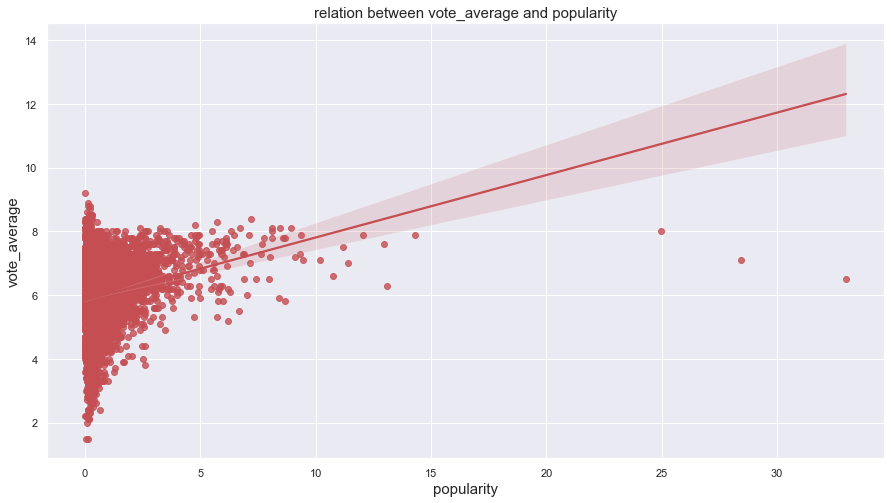

In [46]:
# use the function regplot to make a scatterplot
sns.regplot(x=df["popularity"], y=df["vote_average"],color='r');
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('relation between vote_average and popularity',fontsize=15);
plt.xlabel('popularity',fontsize=15); 
plt.ylabel('vote_average',fontsize=15); 



very weak correlation and i find oulires

An outlier for a scatter plot is the point or points that are farthest from the regression line.
There is at least one outlier on a scatter plot in most cases,
and there is usually only one outlier.

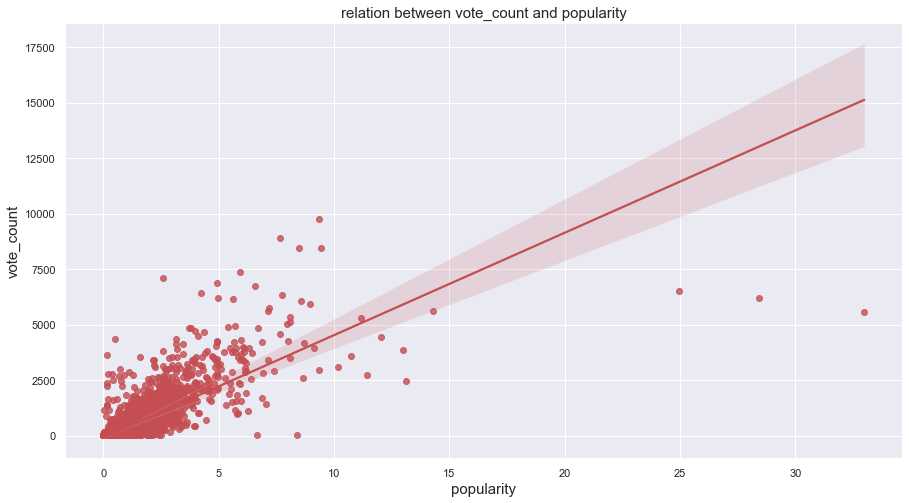

In [48]:
# use regplot to make a scatterplot
sns.regplot(x=df["popularity"], y=df["vote_count"],color='r');
sns.set(rc = {'figure.figsize':(15,8)})
plt.title('relation between vote_count and popularity',fontsize=15);
plt.xlabel('popularity',fontsize=15); 
plt.ylabel('vote_count',fontsize=15); 


Somewhat find correlation but weak

# Research Question 6 ( number of films per year?)

In [53]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'overview', 'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year'],
      dtype='object')

In [55]:
q4 = df['release_year'].value_counts().head(8)
q4

2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    489
Name: release_year, dtype: int64

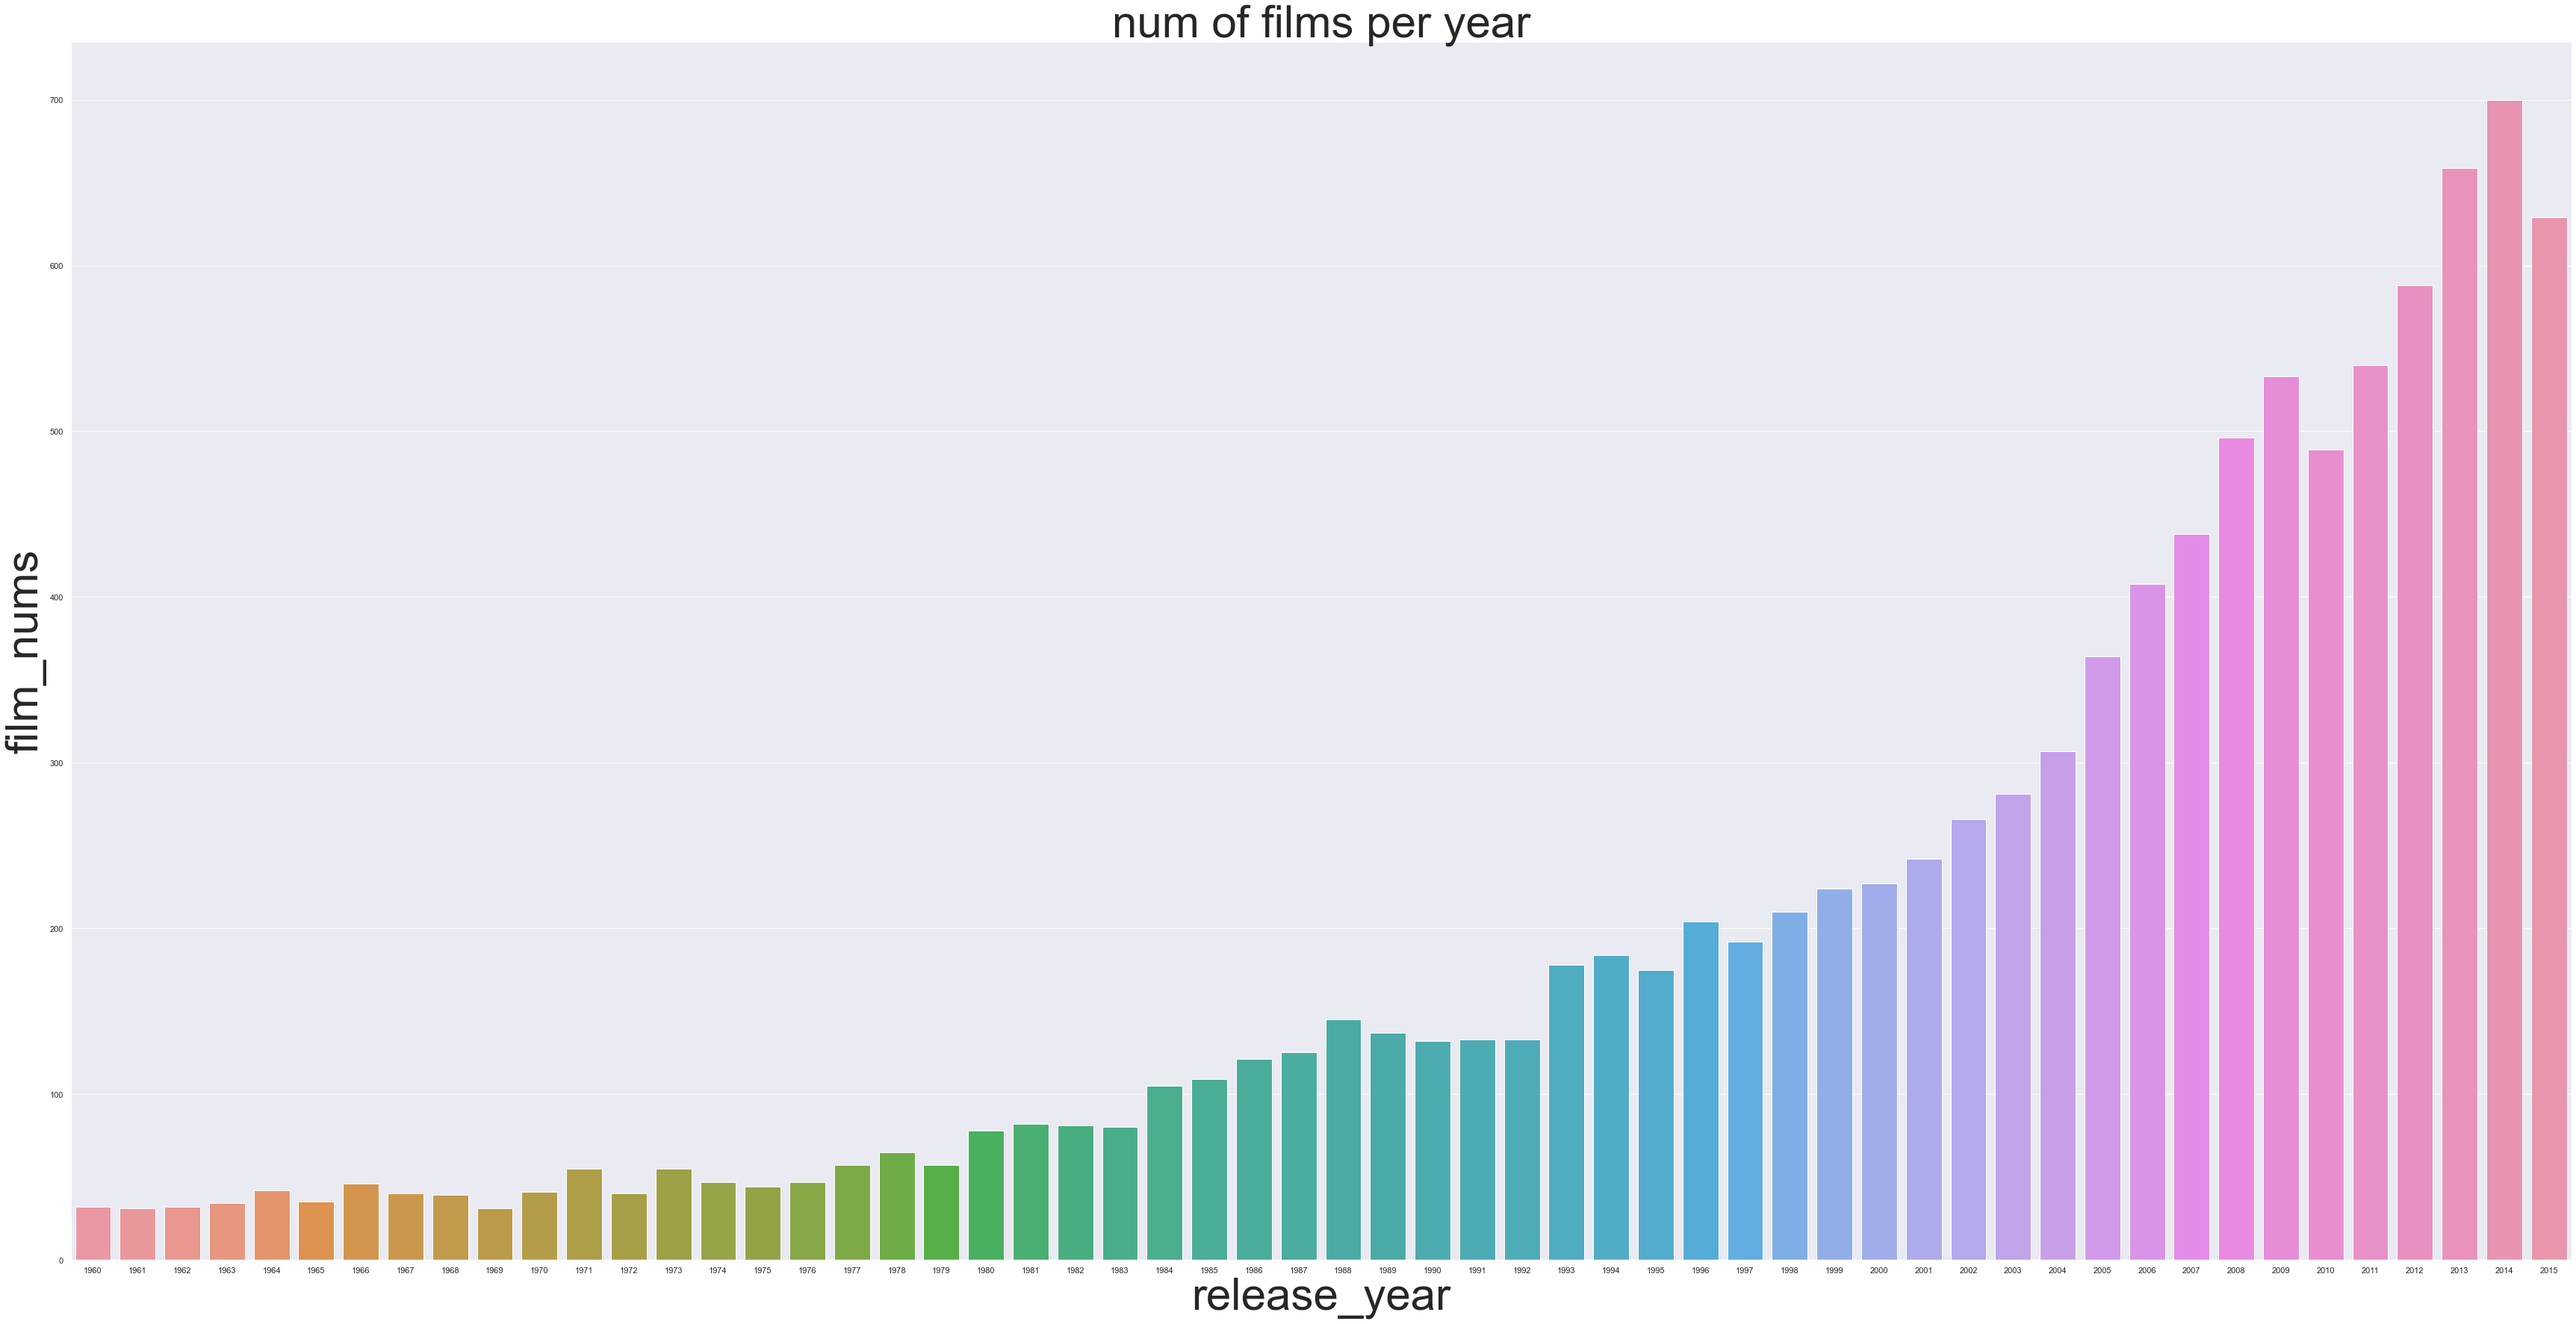

In [56]:
sns.countplot(x='release_year' ,data =df,label='release_year')
sns.set(rc={'figure.figsize':(60,30)})
plt.title('num of films per year',fontsize=60);
plt.xlabel('release_year',fontsize=60); 
plt.ylabel('film_nums',fontsize=60); 

'2014' is The most years in which films have been produced

# Research Question 7 (from whate consist genres column?)


In [60]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'overview', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [61]:
len(df['release_year'].unique())

56

In [62]:
df.genres

0        Action|Adventure|Science Fiction|Thriller
1        Action|Adventure|Science Fiction|Thriller
2               Adventure|Science Fiction|Thriller
3         Action|Adventure|Science Fiction|Fantasy
4                            Action|Crime|Thriller
                           ...                    
10861                                  Documentary
10862                       Action|Adventure|Drama
10863                               Mystery|Comedy
10864                                Action|Comedy
10865                                       Horror
Name: genres, Length: 10865, dtype: object

In [ ]:
items1=[]
for value in df['genres']:
    items1.append(value.split('|'))

In [64]:
items1  

[['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Thriller'],
 ['Adventure', 'Science Fiction', 'Thriller'],
 ['Action', 'Adventure', 'Science Fiction', 'Fantasy'],
 ['Action', 'Crime', 'Thriller'],
 ['Western', 'Drama', 'Adventure', 'Thriller'],
 ['Science Fiction', 'Action', 'Thriller', 'Adventure'],
 ['Drama', 'Adventure', 'Science Fiction'],
 ['Family', 'Animation', 'Adventure', 'Comedy'],
 ['Comedy', 'Animation', 'Family'],
 ['Action', 'Adventure', 'Crime'],
 ['Science Fiction', 'Fantasy', 'Action', 'Adventure'],
 ['Drama', 'Science Fiction'],
 ['Action', 'Comedy', 'Science Fiction'],
 ['Action', 'Adventure', 'Science Fiction'],
 ['Crime', 'Drama', 'Mystery', 'Western'],
 ['Crime', 'Action', 'Thriller'],
 ['Science Fiction', 'Action', 'Adventure'],
 ['Romance', 'Fantasy', 'Family', 'Drama'],
 ['War', 'Adventure', 'Science Fiction'],
 ['Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery'],
 ['Action', 'Drama'],
 ['Action'

In [65]:
items2=[]
for value in items1:
    for value1 in value:
        items2.append(value1)

In [82]:
items2 

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Action',
 'Adventure',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Crime',
 'Thriller',
 'Western',
 'Drama',
 'Adventure',
 'Thriller',
 'Science Fiction',
 'Action',
 'Thriller',
 'Adventure',
 'Drama',
 'Adventure',
 'Science Fiction',
 'Family',
 'Animation',
 'Adventure',
 'Comedy',
 'Comedy',
 'Animation',
 'Family',
 'Action',
 'Adventure',
 'Crime',
 'Science Fiction',
 'Fantasy',
 'Action',
 'Adventure',
 'Drama',
 'Science Fiction',
 'Action',
 'Comedy',
 'Science Fiction',
 'Action',
 'Adventure',
 'Science Fiction',
 'Crime',
 'Drama',
 'Mystery',
 'Western',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Action',
 'Adventure',
 'Romance',
 'Fantasy',
 'Family',
 'Drama',
 'War',
 'Adventure',
 'Science Fiction',
 'Action',
 'Family',
 'Science Fiction',
 'Adventure',
 'Mystery',
 'Action',
 'Drama',
 

In [66]:
gener=[]
for value in items2:
    if value not in gener:
        gener.append(value)
gener        

['Action',
 'Adventure',
 'Science Fiction',
 'Thriller',
 'Fantasy',
 'Crime',
 'Western',
 'Drama',
 'Family',
 'Animation',
 'Comedy',
 'Mystery',
 'Romance',
 'War',
 'History',
 'Music',
 'Horror',
 'Documentary',
 'TV Movie']

In [67]:
len(gener)

19

number of geners is 19 'Action','Adventure','Science Fiction','Thriller','Fantasy','Crime','Western','Drama','Family','Animation','Comedy','Mystery','Romance','War','History',
'Music','Horror','Documentary','TV Movie'

# Research Question 8 (How many film created for each gener?)

In [68]:
items2=[]
for value in items1:
    for value1 in value:
        items2.append(value1)

In [69]:
Counter(items2) #i used modul counter from coolections

Counter({'Action': 90,
         'Adventure': 64,
         'Science Fiction': 60,
         'Thriller': 124,
         'Fantasy': 30,
         'Crime': 40,
         'Western': 6,
         'Drama': 184,
         'Family': 36,
         'Animation': 33,
         'Comedy': 109,
         'Mystery': 26,
         'Romance': 41,
         'War': 8,
         'History': 11,
         'Music': 21,
         'Horror': 80,
         'Documentary': 14,
         'TV Movie': 12})

In [70]:
gener_count=[{'Action': 90,
         'Adventure': 64,
         'Science Fiction': 60,
         'Thriller': 124,
         'Fantasy': 30,
         'Crime': 40,
         'Western': 6,
         'Drama': 184,
         'Family': 36,
         'Animation': 33,
         'Comedy': 109,
         'Mystery': 26,
         'Romance': 41,
         'War': 8,
         'History': 11,
         'Music': 21,
         'Horror': 80,
         'Documentary': 14,
         'TV Movie': 12}]
df2=pd.DataFrame(gener_count)
df2

,Action,Adventure,Science Fiction,Thriller,Fantasy,Crime,Western,Drama,Family,Animation,Comedy,Mystery,Romance,War,History,Music,Horror,Documentary,TV Movie
0,90,64,60,124,30,40,6,184,36,33,109,26,41,8,11,21,80,14,12


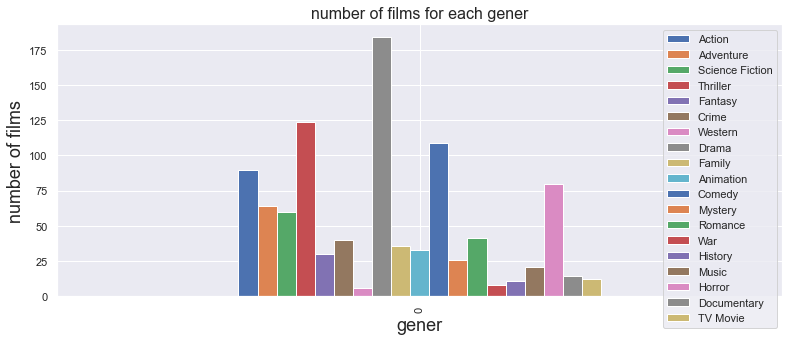

In [71]:
df2.plot(kind='bar',figsize=(13,5),label=gener);
plt.title('number of films for each gener',fontsize=16);
plt.xlabel('gener', fontsize=18);
plt.ylabel('number of films', fontsize=18); 


Drama come first following by thriller and comedy at number of films that created in it

# Research Question 9 (What kinds of properties are associated with movies that have high revenues?)

In [72]:
df.columns

Index(['id', 'popularity', 'budget', 'revenue', 'original_title', 'director',
       'overview', 'runtime', 'genres', 'release_date', 'vote_count',
       'vote_average', 'release_year'],
      dtype='object')

In [74]:
df[['popularity','budget','revenue','runtime','vote_average']].head(3)

,popularity,budget,revenue,runtime,vote_average
0,32.985763,150000000,1513528810,124,6.5
1,28.419936,150000000,378436354,120,7.1
2,13.112507,110000000,295238201,119,6.3


i wiil use satter plot to eplain relation between revenue and other properties 

### does popularity affected the revenue

Text(0, 0.5, 'popularity')

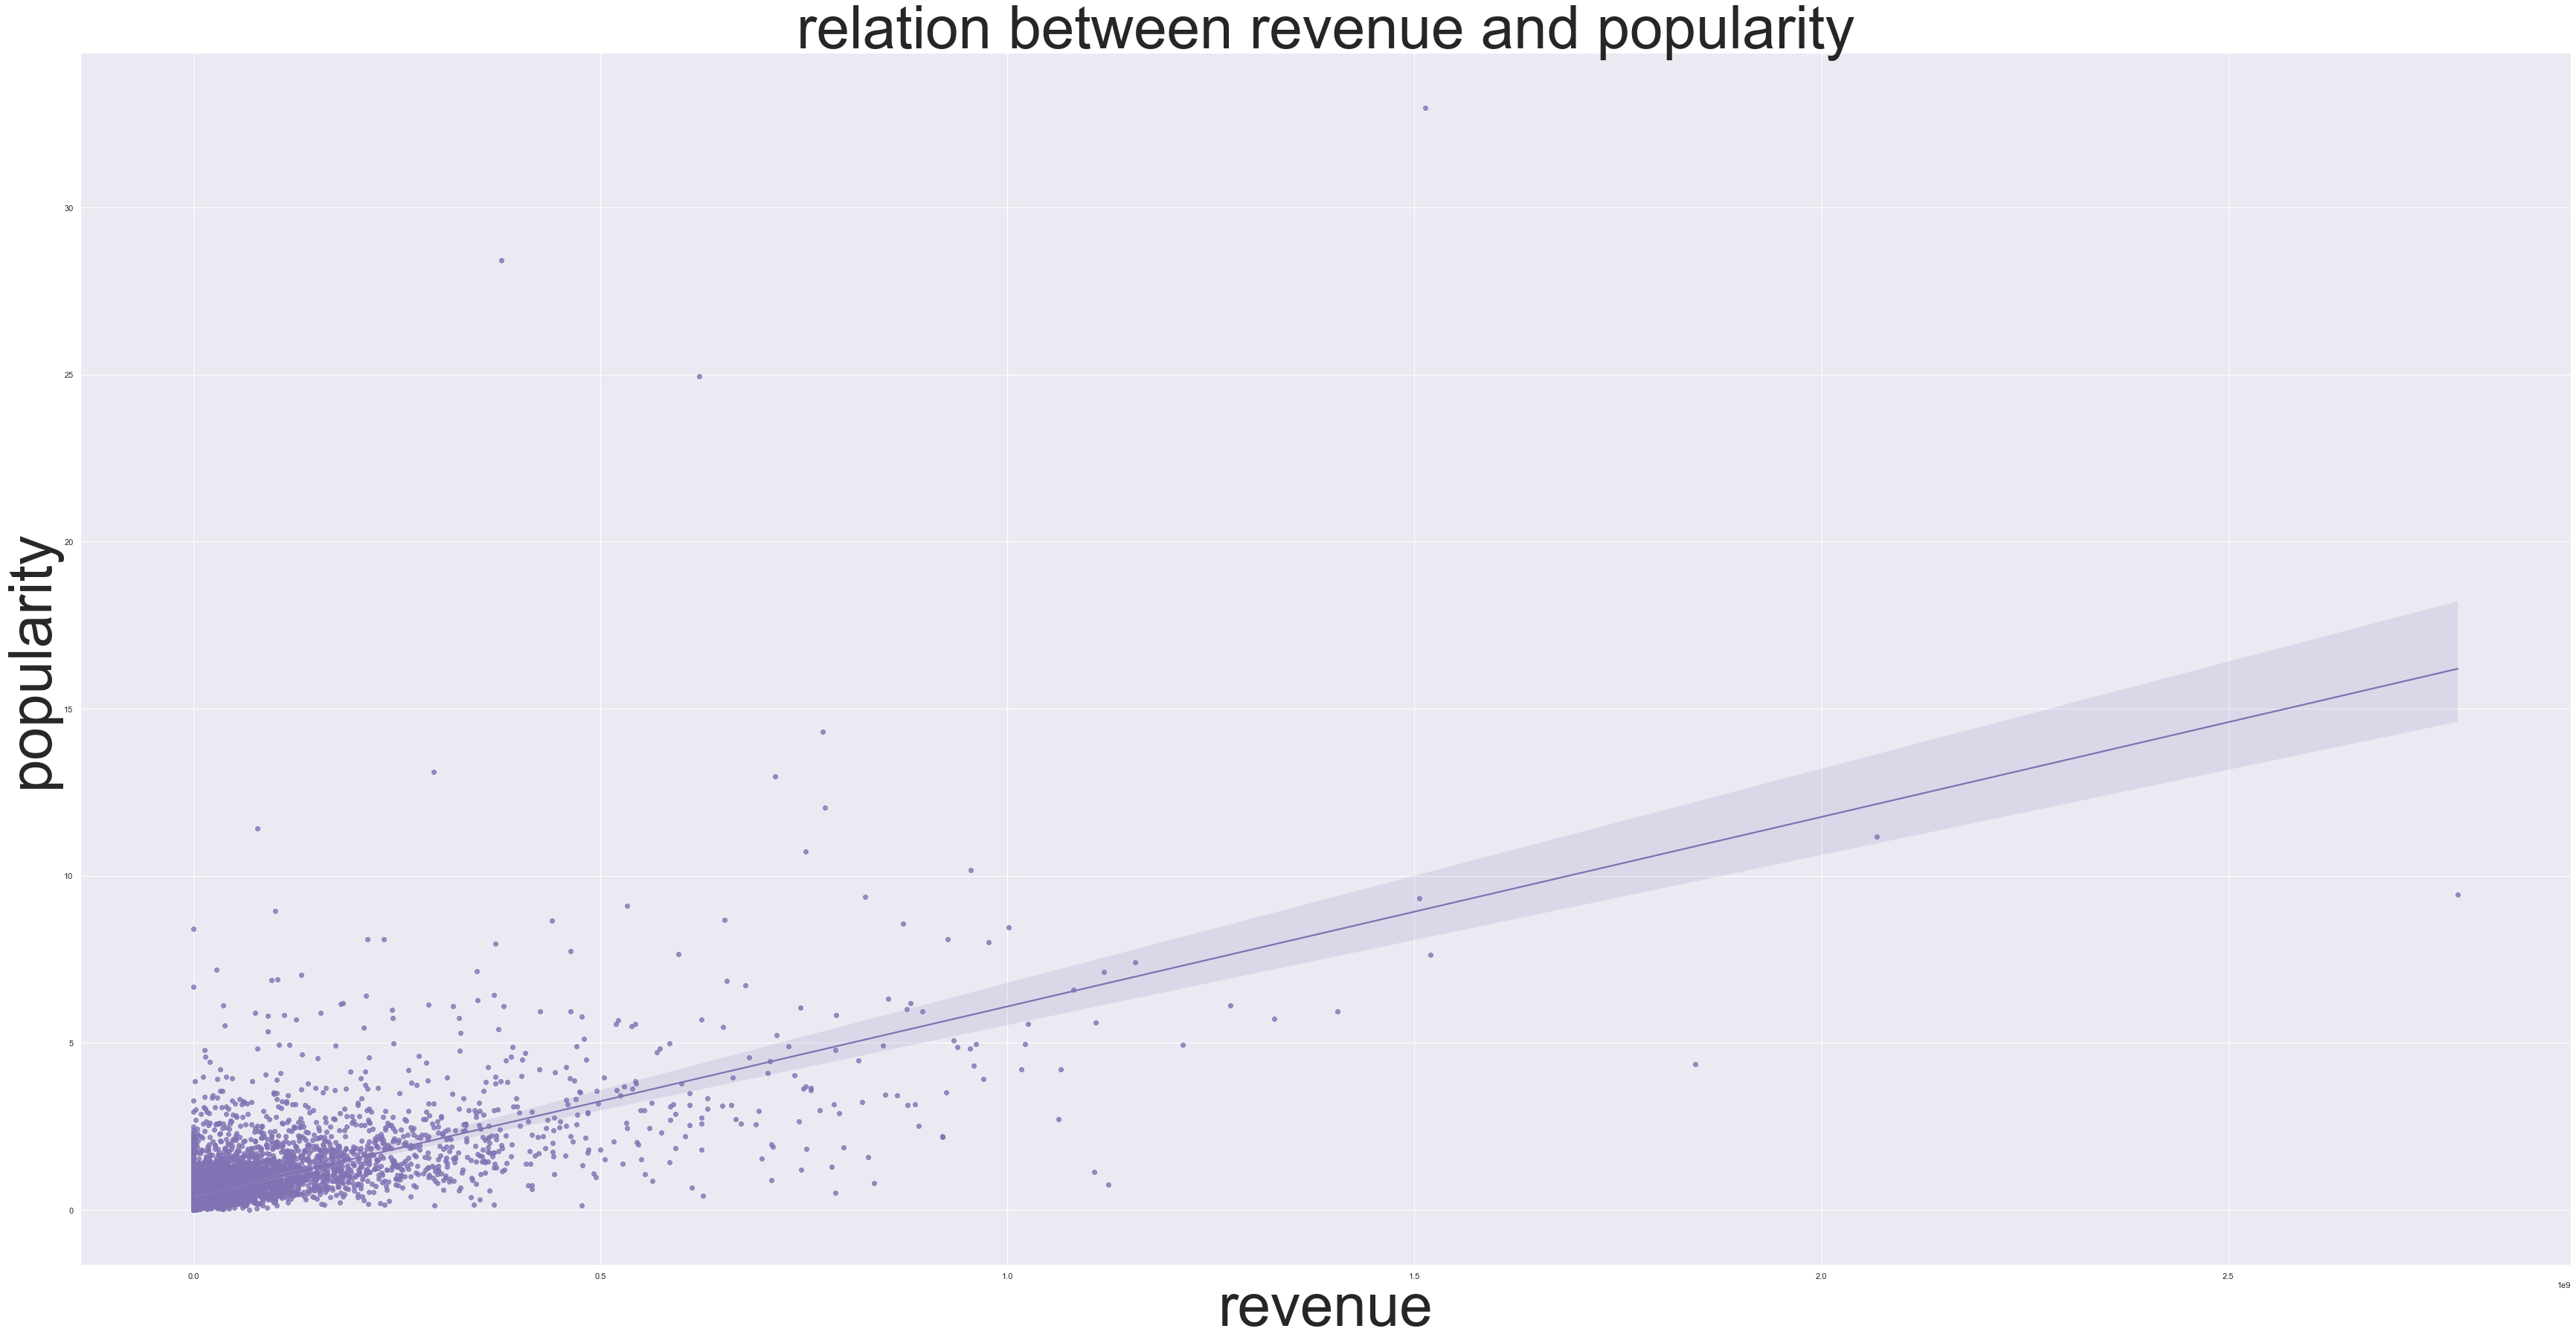

In [80]:
sns.regplot(x=df["revenue"], y=df["popularity"],color='m')
#df.plot(x='revenue',y='popularity',kind='scatter',color='m');
plt.title('relation between revenue and popularity',fontsize=80)
plt.xlabel('revenue', fontsize=80)
plt.ylabel('popularity', fontsize=80)

correlation weak and found oulires

### does budget affected the revenue

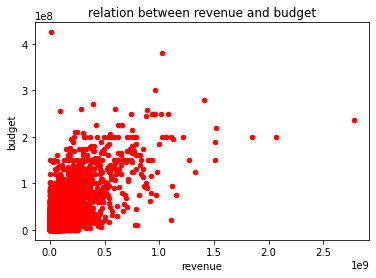

In [112]:
df.plot(x='revenue',y='budget',kind='scatter',color='r');
plt.title('relation between revenue and budget');
plt.xlabel('revenue');
plt.ylabel('budget');

correlation is high,There is a strong relation between revenue and budget 


### does runtime affected the revenue

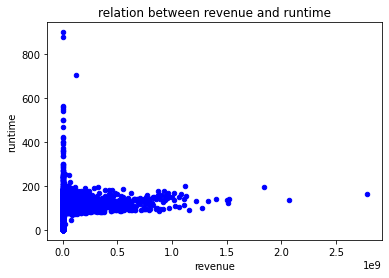

In [113]:
df.plot(x='revenue',y='runtime',kind='scatter',color='b');
plt.title('relation between revenue and runtime');
plt.xlabel('revenue');
plt.ylabel('runtime');

correlation is very low

### does vote_average affected the revenue

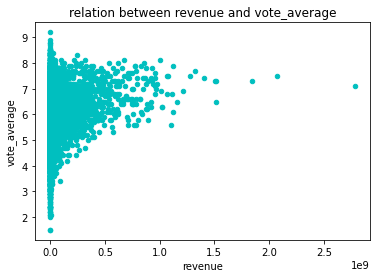

In [114]:
df.plot(x='revenue',y='vote_average',kind='scatter',color='c');
plt.title('relation between revenue and vote_average');
plt.xlabel('revenue');
plt.ylabel('vote_average');

correlation is very low

<a id='conclusions'></a>
## Conclusions

1- the highest vote_average at 2006 following by 2011 
 

2-  (Jurassic World) World has the best popularity

3-  (Avatar) has the highest revenue

4- correlation btween popularity and vote_count  low but relation  btween popularity very weak with  vote average 

5-  number of films for heigh 8 year sorted is:

2014   =    700

2013   =    659

2015  =    629

2012    =  588

2011  =   540
 
2009  =   533

2008  =   496

2010  =   489



6- Drame, Thriller, Comedy  are three most-made genres.

7-Movies with higher budgets have shown a corresponding increase in the revenues.
  
8-The revenues don't seem to change with higher vote average and run time because The correlation is very low.

9-The revenue seems to be increasing with popularity. We can say that if the popularity of movie is high then the revenue of the movie may be high
  
 

## Limitations

when I split the data seperated by '|' into lists for easy parsing . This increases the time taken in calculating the result



In [72]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0